## Install and Setup Enviroment

In [ ]:
!pip install git+https://github.com/facebookresearch/detectron2@main#subdirectory=projects/DensePose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2 (to revision main) to /tmp/pip-req-build-rr3i9sta
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2 /tmp/pip-req-build-rr3i9sta
  Resolved https://github.com/facebookresearch/detectron2 to commit 2c6c380f94a27bd8455a39506c9105f652b9f760
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-install-v8rz2v2_/detectron2_62fa2fdeded449fc9c24d0c63340f219
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-v8rz2v2_/detectron2_62fa2fdeded449fc9c24d0c63340f219
  Resolved https://github.com/facebookresearch/detectron2.git to commit 2c6c380f94a27bd8455a39506c9105f652b9f760
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0

In [ ]:
!git clone https://github.com/Whizz-Technologies/detectron2-barinov

Cloning into 'detectron2-barinov'...
remote: Enumerating objects: 14939, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 14939 (delta 16), reused 16 (delta 9), pack-reused 14911
Receiving objects: 100% (14939/14939), 6.05 MiB | 12.51 MiB/s, done.
Resolving deltas: 100% (10857/10857), done.


In [ ]:
cd detectron2-barinov/projects/DensePose

/content/detectron2-barinov/projects/DensePose


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/Densepose weights/model_final_0ed407.pkl' ./

##Upload

Saving IMG_1859.png to IMG_1859.png


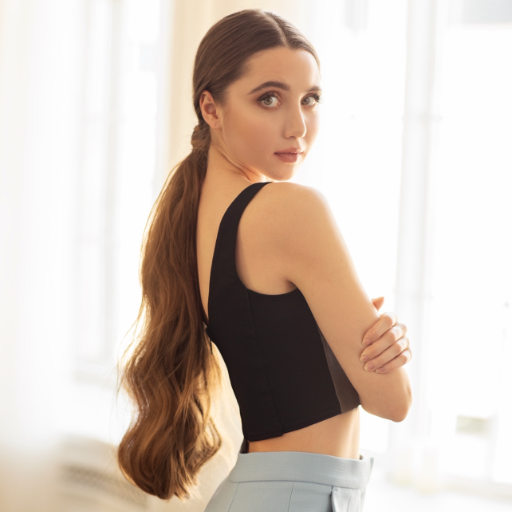

In [ ]:
#@title Upload
from google.colab import files
from PIL import Image
import io
uploaded = files.upload()
image = Image.open(io.BytesIO(list(uploaded.values())[0]))
image.save('/content/detectron2-barinov/projects/DensePose/image.png')
image

## Infer

In [ ]:
cd /content/detectron2-barinov/projects/DensePose

/content/detectron2-barinov/projects/DensePose


In [ ]:
path = '/content/'
import os
for file in os.listdir(path):
  if 'seg' in file and 'segmentation' not in file:
    os.remove(os.path.join(path,file))

In [ ]:
path = '/content/detectron2-barinov/projects/DensePose'
import os
for file in os.listdir(path):
  if 'image_' in file:
    os.remove(os.path.join(path,file))

In [ ]:
!python apply_net.py show configs/densepose_rcnn_R_50_FPN_DL_s1x.yaml model_final_0ed407.pkl "/content/detectron2-barinov/projects/DensePose/image.png" dp_segm --output "/content/out.jpg"

Called
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
index 0
Saving Segmented Result
Unique in segm [ 0  1  2  3  4 18 19 20 22 23 24] shape (494, 304)
Unique in mask [0 1] shape (494, 304)
Matrix unique value before scale [ 0  1  2  3  4 18 19 20 22 23 24]
Matrix unique value after scale [  0.     10.625  21.25   31.875  42.5   191.25  201.875 212.5   233.75
 244.375 255.   ]


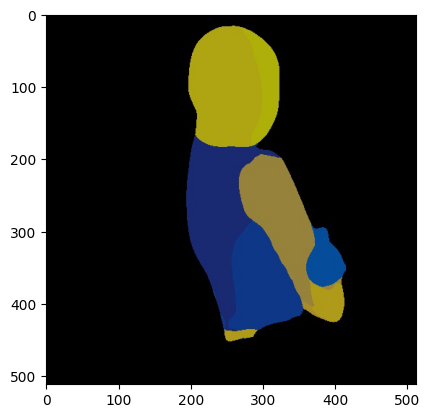

In [ ]:
import matplotlib.pyplot as plt

#@title Showing the overlayed mask
img = Image.open('/content/out.0001.jpg')
plt.imshow(img)


## Generating Final Mask

seg_0.npy
0


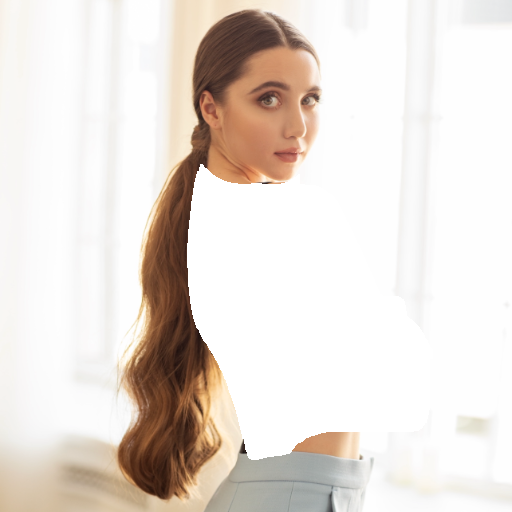

In [ ]:
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

path = '/content/'
for file in os.listdir(path):
    if 'seg' in file and '.npy' in file:

        print(file)
        id = file.split('_')[1].split('.')[0]
        print(int(id))

        img_segm = np.load(os.path.join(path, file))
        h,w=img_segm.shape
        hp=int((3/100)*h)
        img_segm_2 = np.load(os.path.join(path, file))
        im=np.load(os.path.join(path, file))
        orig_img = cv2.imread('/content/detectron2-barinov/projects/DensePose/image.png')

        # Invert the mask
        img_segm[(img_segm > 0) & (img_segm < 23)] = 0
        img_segm[img_segm >= 23] = 255
        inverse_mask = cv2.bitwise_not(img_segm)


        img_segm_2[img_segm_2 >= 23] = 0
        img_segm_2[(img_segm_2 > 0) & (img_segm_2 < 23)] = 255

        h, w = img_segm_2.shape[:2]
        i_h = int(1.5 * h / 100)
        i_w = int(5* w / 100)
        img_segm_2 = cv2.resize(img_segm_2, (w + i_w, h + i_h))
        dh, dw = int(i_h / 2), int(i_w / 2)

        img_segm_2 = img_segm_2[i_h:h - (i_h - dh)+i_h-dh, i_w:w - (i_w - dw)+i_w-dw]
        img_segm_2 = cv2.resize(img_segm_2, (w, h))
       
        _,img=cv2.threshold(img_segm_2, 1, 255, cv2.THRESH_BINARY)
        
     
        # Update the mask to fill gaps in rows and columns
        for row in range(img.shape[0]):
          row_pixels = np.where(img[row] > 0)[0]
          if len(row_pixels)>0 :
            img[row,row_pixels[0]:row_pixels[-1]]=255


        for col in range(img.shape[1]):
          col_pixels = np.where(img[:, col] > 0)[0]
          if len(col_pixels) > 0 :
              img[col_pixels[0]:col_pixels[-1], col] = 255

        # Extend the mask vertically based on a predefined range 
        l=[hp+1,h-hp-1]
        for i in l:
          if img[i].any()>0:
            if i>h//2:
              img[i:]=img[i]
            else:
              img[:i]=img[i]
            
        # Invert the extended mask
        inverse_mask_2 = cv2.bitwise_not(img)
        
        # Create a white image
        white_image = np.full_like(orig_img, (255, 255, 255))

        # Apply the inverted mask to the white image
        masked_area1 = cv2.bitwise_and(orig_img, orig_img, mask=inverse_mask)
        masked_area2=cv2.bitwise_and(orig_img, orig_img, mask=img_segm)
        
        # Apply the mask to the original image
        masked_image = cv2.bitwise_and(white_image, white_image, mask=img)

        # Combine the masked area and masked image
        result = cv2.add(masked_area1, masked_image)
        # Add the masked area from the second masked area to the result
        for row in range(img.shape[0]):
          row_pixels = np.where(masked_area2[row] > 0)[0]
          if len(row_pixels)>0 :
            for i in row_pixels:
              result[row,i]=masked_area2[row,i]


        cv2_imshow(result)

        cv2.imwrite('/content/detectron2-barinov/projects/DensePose/image_{}.png'.format(id), result)
